<a href="https://colab.research.google.com/github/mkakade92/DeepLearning/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T
import torch.nn as nn
import torch.nn.functional as F

In [2]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw
Processing...
Done!


In [0]:
def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


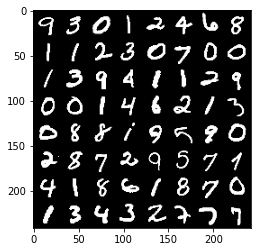

In [5]:
dataiter=iter(train_loader)
image,labels=dataiter.next()
imshow(torchvision.utils.make_grid(image))

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5,stride=1)
        self.pool1 = nn.AvgPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5,stride=1)
        self.pool2 = nn.AvgPool2d(kernel_size=2,stride=2)
        self.conv3 = nn.Conv2d(16,120,kernel_size=3,stride=1)
        self.fc1 = nn.Linear(480, 84)
        self.fc2 = nn.Linear(84, 10)


    def forward(self, x):
        x = F.tanh(self.conv1(x))
        x=  F.tanh(self.pool1(x))
        x=  F.tanh(self.conv2(x))
        x = F.tanh(self.pool2(x))
        x=  F.tanh(self.conv3(x))
        x=  x.view(x.size(0),-1)
        # print(x.shape)
        x=  F.tanh(self.fc1(x))
        x=  F.log_softmax(self.fc2(x))

        return x

In [0]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [0]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [0]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))


In [0]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [20]:
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307556
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.287229
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.275050
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.266139
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.251289
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.251430
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.208318
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.204483
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.170688
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.119634
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.084500
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.037951
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.938435
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.984590
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.810265
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.835007
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.691530
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.631189
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.562946
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.394518
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.3900, Accuracy: 8917/10000 (89%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.491470
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.538904
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.419261
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.300745
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.415735
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.421420
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.386924
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.431576
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.356484
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.257303
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.380074
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.329345
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.597560
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.380394
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.454138
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.470659
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.358002
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.442180
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.356293
Train Epoch: 2 [12160